# Урок 5. Секвенирование

## Домашнее задание.

1. Установите UGENE.
2. Посредством NCBI скачайте геном референсной последовательности (желательно бактериальной), риды, и попробуйте выполнить следующие операции:  
 - проверить качество ридов;  
 - провести выравнивание ридов на геном.

Предоставьте файл с проверкой качества в формате `.html` и файл с выравниванием в формате `.sam`.



## Задание выполнено командой M4 Team.
__Состав команды:__  
 - Мгер Парунакян
 - Михаил Демин
 - Марат Закиров
 - Марина Дружинина

In [ ]:
!sudo apt install bwa samtools fastqc bowtie gffread
!pip install gdown
!gdown --no-check-certificate --folder https://drive.google.com/drive/folders/12rnP9vXZRRVbnHPY6r2-XbnStpkic4v0?usp=sharing

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  ant ant-optional cwltool fonts-glyphicons-halflings libactivation-java
  libaopalliance-java libapache-pom-java libargs4j-java libasm-java
  libatinject-jsr330-api-java libc-ares2 libcdi-api-java libcglib-java
  libcodemodel-java libcommons-cli-java libcommons-codec-java
  libcommons-compress-java libcommons-io-java libcommons-jexl2-java
  libcommons-lang3-java libcommons-logging-java libcommons-math3-java
  libcommons-parent-java libdom4j-java libdtd-parser-java libfastinfoset-java
  libfindbin-libs-perl libgclib1 libgeronimo-annotation-1.3-spec-java
  libgeronimo-interceptor-3.0-spec-java libguava-java libguice-java
  libhawtjni-runtime-java libhts3 libhtsjdk-java libhttpclient-java
  libhttpcore-java libistack-commons-java libjansi-java libjansi-native-java
  libjaxb-api-java libjaxb-java libjaxen-java libjbzip2-java libjs-bootstrap
 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp /content/drive/MyDrive/M4_MikhailAligned.out.sam.gz /content/M4_MikhailAligned.out.sam.gz

In [5]:
!gunzip M4_MikhailAligned.out.sam.gz

In [7]:
!samtools view M4_MikhailAligned.out.sam|head

SRR21375816.1	0	NC_002695.2	4836516	0	75M	*	0	0	GAAAGNATCTAAGCACGAAACTTGCCCCGAGATGAGTTCTCCCTGACCCTTTAAGGGTCCTGAAGGAACGTTGAA	A6AAA!AEEEEEEEAEEEEEEEEEE/AEAEE6<EEEEE/EEEA<EEEEEA/EAAEEEE<EAAEE/EEEEEEE/A<	NH:i:7	HI:i:1	AS:i:72	nM:i:0
SRR21375816.1	256	NC_002695.2	5021723	0	75M	*	0	0	GAAAGNATCTAAGCACGAAACTTGCCCCGAGATGAGTTCTCCCTGACCCTTTAAGGGTCCTGAAGGAACGTTGAA	A6AAA!AEEEEEEEAEEEEEEEEEE/AEAEE6<EEEEE/EEEA<EEEEEA/EAAEEEE<EAAEE/EEEEEEE/A<	NH:i:7	HI:i:2	AS:i:72	nM:i:0
SRR21375816.1	256	NC_002695.2	4980697	0	75M	*	0	0	GAAAGNATCTAAGCACGAAACTTGCCCCGAGATGAGTTCTCCCTGACCCTTTAAGGGTCCTGAAGGAACGTTGAA	A6AAA!AEEEEEEEAEEEEEEEEEE/AEAEE6<EEEEE/EEEA<EEEEEA/EAAEEEE<EAAEE/EEEEEEE/A<	NH:i:7	HI:i:3	AS:i:72	nM:i:0
SRR21375816.1	256	NC_002695.2	4740020	0	75M	*	0	0	GAAAGNATCTAAGCACGAAACTTGCCCCGAGATGAGTTCTCCCTGACCCTTTAAGGGTCCTGAAGGAACGTTGAA	A6AAA!AEEEEEEEAEEEEEEEEEE/AEAEE6<EEEEE/EEEA<EEEEEA/EAAEEEE<EAAEE/EEEEEEE/A<	NH:i:7	HI:i:4	AS:i:72	nM:i:0
SRR21375816.1	256	NC_002695.2	231836	0	75M	*	0	0	GAAAGNATCTAAGCACGAAACTTGCCCCG

In [9]:
!samtools view -b M4_MikhailAligned.out.sam >M4_MikhailAligned.out.bam

In [10]:
import gzip
f_in = open('M4_MikhailAligned.out.bam', 'rb')
f_out = gzip.open('M4_MikhailAligned.out.bam.gz', 'wb')
f_out.writelines(f_in)
f_out.close()
f_in.close()

In [11]:
!rm M4_MikhailAligned.out.sam

In [12]:
!cp /content/drive/MyDrive/mikhail.sam.gz /content/mikhail.sam.gz
!gunzip mikhail.sam.gz
!samtools view mikhail.sam|head

SRR21375816.1	0	NC_002695.2	4740020	0	75M	*	0	0	GAAAGNATCTAAGCACGAAACTTGCCCCGAGATGAGTTCTCCCTGACCCTTTAAGGGTCCTGAAGGAACGTTGAA	A6AAA!AEEEEEEEAEEEEEEEEEE/AEAEE6<EEEEE/EEEA<EEEEEA/EAAEEEE<EAAEE/EEEEEEE/A<	NM:i:1	MD:Z:5C69	AS:i:73	XS:i:73
SRR21375816.2	16	NC_002695.2	3449221	5	75M	*	0	0	AACACACATACTGATTCAGGCTCTGGGCTGCTCCCCGTTCGCTCGCCGCTACTGGGGGAATCTCGGTTGNTTTCT	E<EEA/EEEEEEEEEEA6EEE/A6/EEE/EEEEE/EEEEAEEEAAEAEAEEEEEEEAAEEAEEEAE6AE!AAAAA	NM:i:2	MD:Z:8C60A5	AS:i:68	XS:i:63
SRR21375816.3	0	NC_002695.2	4978294	0	75M	*	0	0	AAAATNCACATGCTGTGAGCTCGATGAGTAGGGCGGGACACGTGGTATCCTGTCTGAATATGGGGGGACCATCCT	AAAAA!EEEEEEEEEEEEEAEEEEEEEEEEEEEAEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEAEEEEEAA	NM:i:1	MD:Z:5G69	AS:i:73	XS:i:73
SRR21375816.4	16	NC_002695.2	3447304	0	75M	*	0	0	TACGGGTCAACGTTAGAACATCAAACATTAAAGGGTGGTATTTCAAGGTCGGCTCCATGCAGACTGGCGNCCACA	AEEE/EE/EAEEAEAEE/EEEEEEEEEEEE/EEEE/EE6EE6EEEEAA/EEEEEEEEEEEEEEEEAEEE!AAAAA	NM:i:3	MD:Z:0C7C60T5	AS:i:67	XS:i:67
SRR21375816.5	16	NC_002695.2	4159717	0	75M	*	0	0	GTTAGAACATC

In [13]:
!samtools view -b mikhail.sam >mikhail.bam

In [15]:
!samtools view mikhail.bam|head

SRR21375816.1	0	NC_002695.2	4740020	0	75M	*	0	0	GAAAGNATCTAAGCACGAAACTTGCCCCGAGATGAGTTCTCCCTGACCCTTTAAGGGTCCTGAAGGAACGTTGAA	A6AAA!AEEEEEEEAEEEEEEEEEE/AEAEE6<EEEEE/EEEA<EEEEEA/EAAEEEE<EAAEE/EEEEEEE/A<	NM:i:1	MD:Z:5C69	AS:i:73	XS:i:73
SRR21375816.2	16	NC_002695.2	3449221	5	75M	*	0	0	AACACACATACTGATTCAGGCTCTGGGCTGCTCCCCGTTCGCTCGCCGCTACTGGGGGAATCTCGGTTGNTTTCT	E<EEA/EEEEEEEEEEA6EEE/A6/EEE/EEEEE/EEEEAEEEAAEAEAEEEEEEEAAEEAEEEAE6AE!AAAAA	NM:i:2	MD:Z:8C60A5	AS:i:68	XS:i:63
SRR21375816.3	0	NC_002695.2	4978294	0	75M	*	0	0	AAAATNCACATGCTGTGAGCTCGATGAGTAGGGCGGGACACGTGGTATCCTGTCTGAATATGGGGGGACCATCCT	AAAAA!EEEEEEEEEEEEEAEEEEEEEEEEEEEAEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEAEEEEEAA	NM:i:1	MD:Z:5G69	AS:i:73	XS:i:73
SRR21375816.4	16	NC_002695.2	3447304	0	75M	*	0	0	TACGGGTCAACGTTAGAACATCAAACATTAAAGGGTGGTATTTCAAGGTCGGCTCCATGCAGACTGGCGNCCACA	AEEE/EE/EAEEAEAEE/EEEEEEEEEEEE/EEEE/EE6EE6EEEEAA/EEEEEEEEEEEEEEEEAEEE!AAAAA	NM:i:3	MD:Z:0C7C60T5	AS:i:67	XS:i:67
SRR21375816.5	16	NC_002695.2	4159717	0	75M	*	0	0	GTTAGAACATC

In [14]:
!ls

drive			   M4_MikhailAligned.out.bam.gz  mikhail.sam
M4_MikhailAligned.out.bam  mikhail.bam			 sample_data


In [3]:
!sudo apt install -y xvfb python-opengl > /dev/null 2>&1
!pip install pyvirtualdisplay > /dev/null 2>&1
!wget https://github.com/alexdobin/STAR/archive/2.7.10b.tar.gz
# !cp /content/M4_HW5/2.7.10b.tar.gz /content/2.7.10b.tar.gz
!tar -xzf 2.7.10b.tar.gz
%cd STAR-2.7.10b/source
!make STAR > /dev/null 2>&1
import os
os.environ['PATH'] += ":/content/STAR-2.7.10b/source"

--2023-04-19 12:32:25--  https://github.com/alexdobin/STAR/archive/2.7.10b.tar.gz
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/alexdobin/STAR/tar.gz/refs/tags/2.7.10b [following]
--2023-04-19 12:32:25--  https://codeload.github.com/alexdobin/STAR/tar.gz/refs/tags/2.7.10b
Resolving codeload.github.com (codeload.github.com)... 20.205.243.165
Connecting to codeload.github.com (codeload.github.com)|20.205.243.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘2.7.10b.tar.gz’

2.7.10b.tar.gz          [           <=>      ]  11.87M  5.74MB/s    in 2.1s    

2023-04-19 12:32:27 (5.74 MB/s) - ‘2.7.10b.tar.gz’ saved [12443703]

/content/STAR-2.7.10b/source


In [ ]:
%%shell
mkdir /content/sequence
#rm -R /content/sequence

In [ ]:
#%cd /content
#!wget --output-document SRR23625956.fastq.gz https://trace.ncbi.nlm.nih.gov/Traces/sra-reads-be/fastq?acc=SRR23625956
#!cp /content/M4_HW5/SRR23625956.fastq.gz /content/SRR23625956.fastq.gz
#!gunzip SRR23625956.fastq.gz

### Марина Дружинина

**В качестве организма была выбрана бактерия:**  
Escherichia coli O157:H7 str. Sakai.  

**Проект**:  
**Project**: PRJNA937866  
Normal RNA sequence of EHEC cultured in media with different nitrogen supplementations
https://www.ncbi.nlm.nih.gov/bioproject/PRJNA937866  

**Интерпретация отчета**:

- **Basic Statistics**  
указывается информация о предоставленных данных  

- **Per base sequence quality**    
Из данного графика видно, что информация о распределении показателей качества по всем основаниям в каждой позиции в последовательности имеет высокое качество (не менее 30).

- **Per sequence quality scores**  
График «Показатели качества последовательности» дает представление о качестве считываний секвенирования в каждой базовой позиции и облегчает выявление потенциальных проблем или погрешностей в секвенированных данных.  
На данном графике достаточно высокое качество считываний секвенирования в каждой базовой позиции, следственно количество погрешностей и потенциальных проблем в секвенировании сводится к минимуму.

- **Per base sequence content**  
График содержимого базовой последовательности может выявить смещения или ошибки, допущенные во время секвенирования. 
Исходя из этого, в данных имеются ошибки и смещения.    

- **Per sequence GC content**  
График показывает распределение содержания гуанина и цитозина по всем последовательностям.   
Из графика видно, распределение гуанина и цитозина не соответствует рассчитанному теоретическому распределению.

- **Per base N content**
В данных не выявлено неясных или неоднозначных оснований, которые обозначаются буквой «N».  

- **Sequence Length Distribution**  
Распределение длин последоваельностей.  
Из графика видно, что имееся большой разброс длин последовательностей.

- **Sequence Duplication Levels**  
Из графика выдно, что имеется высокий уровень дублирования последовательности,
соответственно это может вызвать проблемы с дальнейшим биоинформационным анализом и указывать на проблемы с подготовкой библиотеки или процессом секвенирования.  
Низкий уровень дупликации может указывать на высокий уровень охвата секвенируемого генома или транскриптома.  

- **Overrepresented sequences**  
В данных много примесей или артефактов, введенных в процессе подготовки библиотеки или процесса секвенирования.  

- **Adapter Content**  
Содержимое адаптеров не выявлено.

In [ ]:
%%shell
name=marina
cp -R /content/M4_HW5/$name /content/sequence/$name
cd /content/sequence/$name
gunzip SRR23625956.fastq.gz
gffread -T sequence.gff3 -o sequence.gtf && rm sequence.gff3

### Мгер Парунакян

In [ ]:
%%shell
name=mher
cp -R /content/M4_HW5/$name /content/sequence/$name
cd /content/sequence/$name
gunzip SRR5742252.fastq.gz
gffread -T sequence.gff3 -o sequence.gtf && rm sequence.gff3

### Михаил Демин

In [ ]:
%%shell
name=mikhail
cp -R /content/M4_HW5/$name /content/sequence/$name
cd /content/sequence/$name
gunzip SRR21375816.fastq.gz
gffread -T sequence.gff3 -o sequence.gtf && rm sequence.gff3

**В качестве организма была выбрана бактерия:**  
Escherichia coli str. K-12 substr. MG1655  

**Проект**:  
**Project**: PRJNA875378  
Global profiling of the RNA and protein complexes of Escherichia coli by size exclusion chromatography followed by RNA sequencing and mass spectrometry (SEC-seq)  
https://www.ncbi.nlm.nih.gov/bioproject/PRJNA875378  

**Интерпретация отчета**:

- **Basic Statistics**  
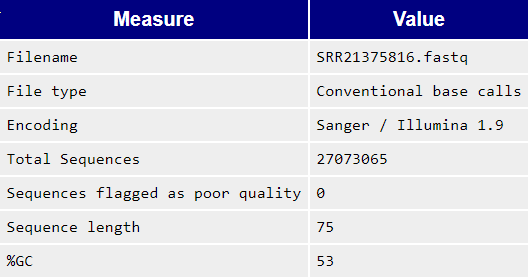

указывается информация о предоставленных данных  

- **Per base sequence quality**  
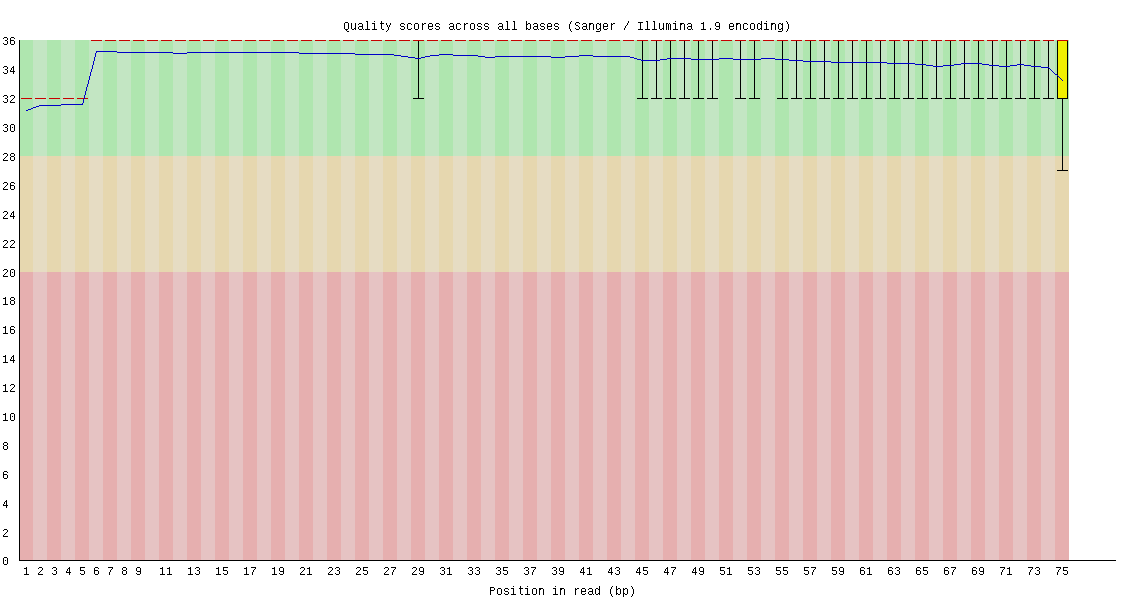    
Из данного графика видно, что информация о распределении показателей качества по всем основаниям в каждой позиции в последовательности имеет высокое качество (не менее 32).

- **Per tile sequence quality**  
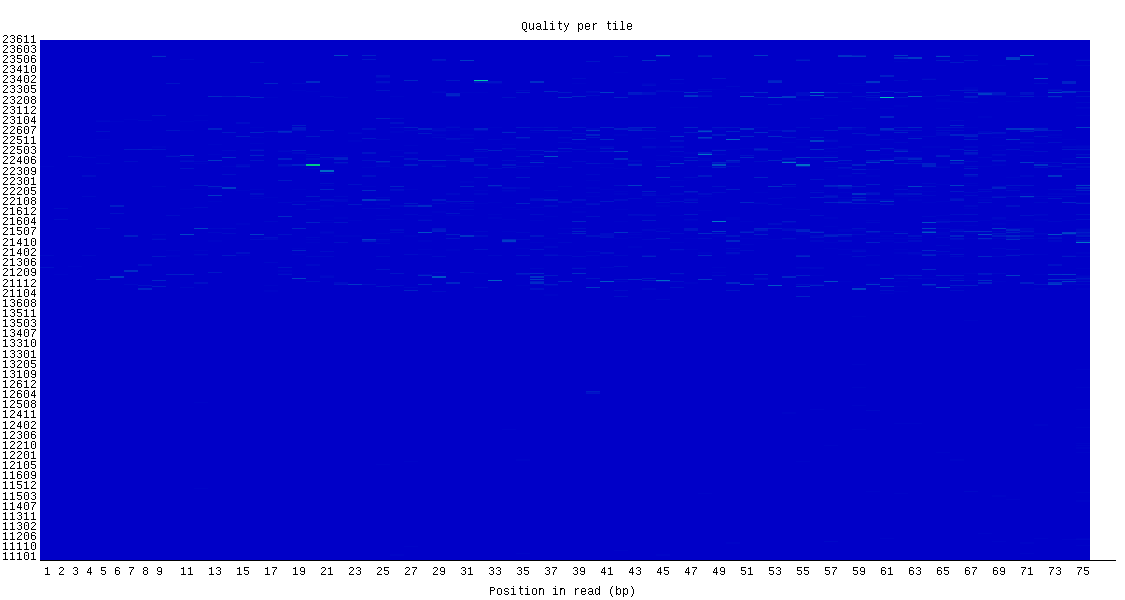  
График, показывающий среднюю оценку качества последовательности для каждой плитки, а также отклонение от среднего качества для каждой плитки.

- **Per sequence quality scores**  
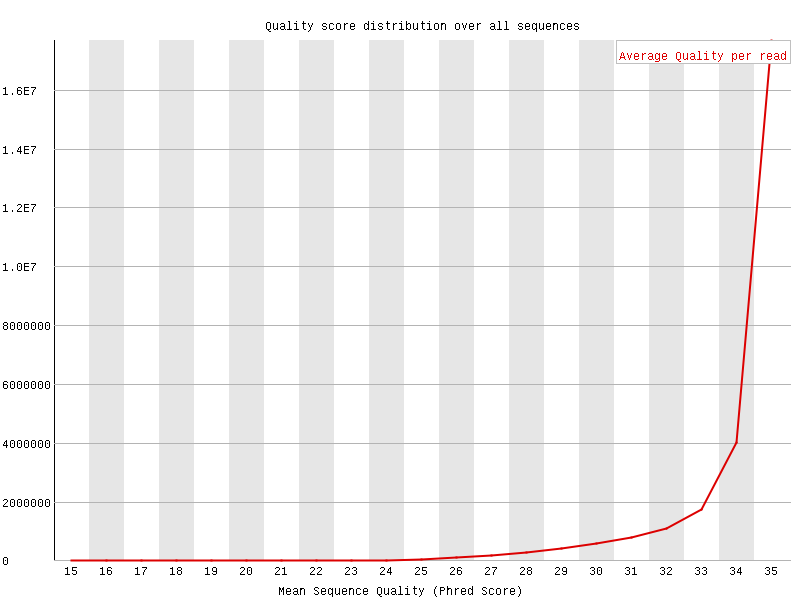  
График «Показатели качества последовательности» дает представление о качестве считываний секвенирования в каждой базовой позиции и облегчает выявление потенциальных проблем или погрешностей в секвенированных данных.  
На данном графике достаточно высокое качество считываний секвенирования в каждой базовой позиции, следственно количество погрешностей и потенциальных проблем в секвенировании сводится к минимуму.

- **Per base sequence content**  
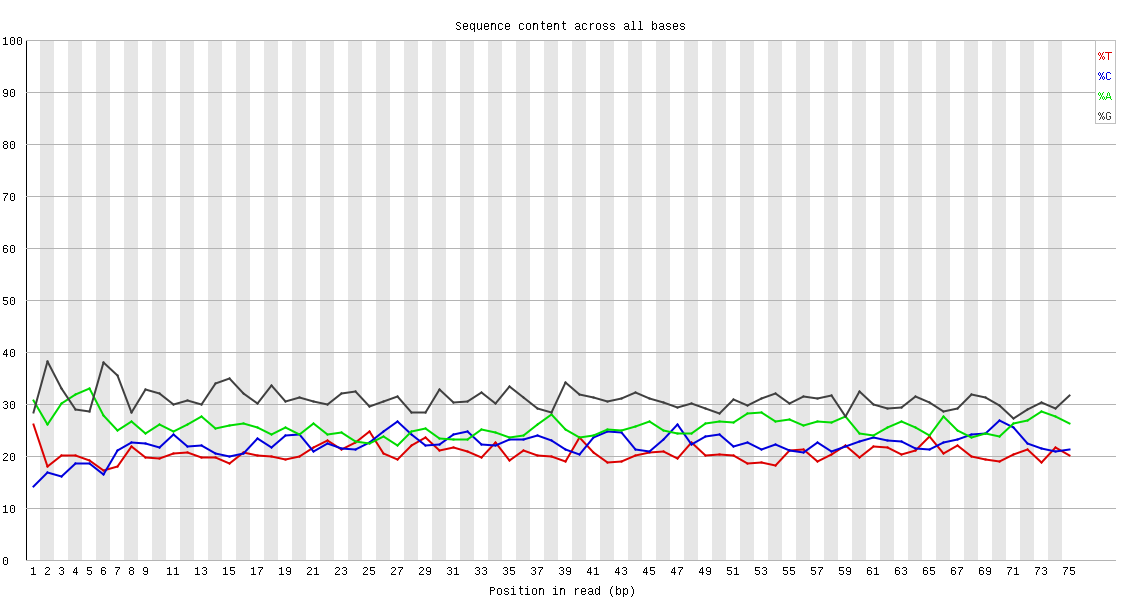  
График содержимого последовательности по основаниям. 
Исходя из данного графика все основания представлены равномерно.    

- **Per sequence GC content**  
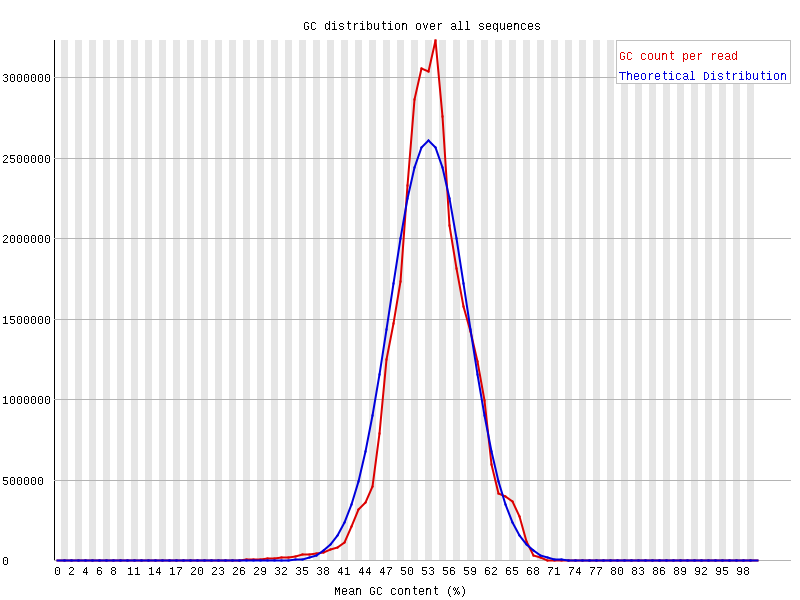
График показывает распределение содержания гуанина и цитозина по всем последовательностям.   
Из графика видно, распределение гуанина и цитозина не соответствует рассчитанному теоретическому распределению.

- **Per base N content**  
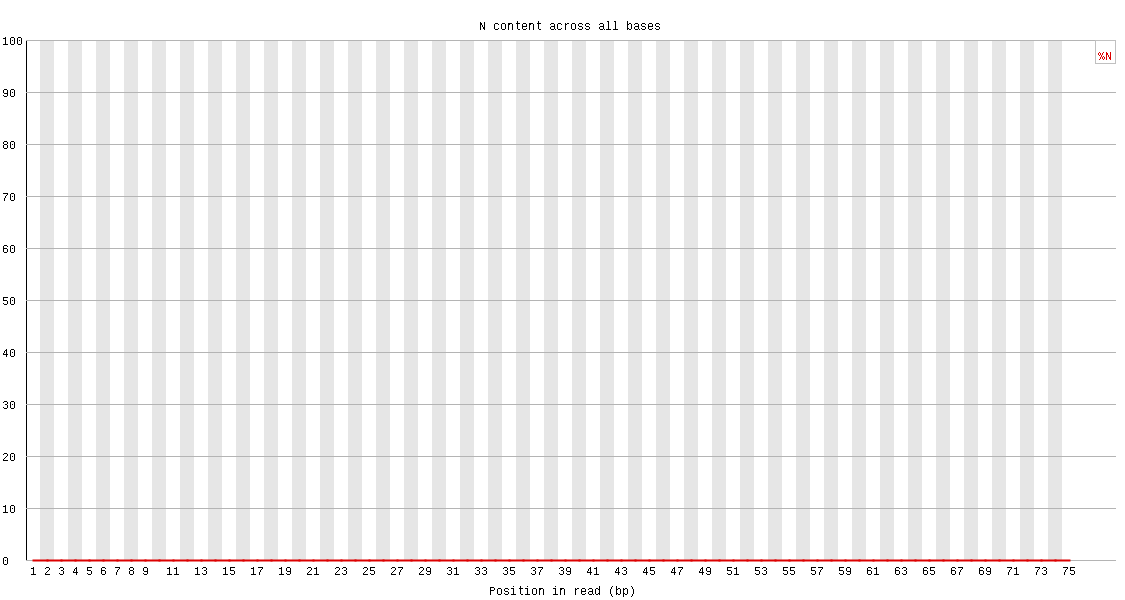  
В данных не выявлено неясных или неоднозначных оснований, которые обозначаются буквой «N».  

- **Sequence Length Distribution**  
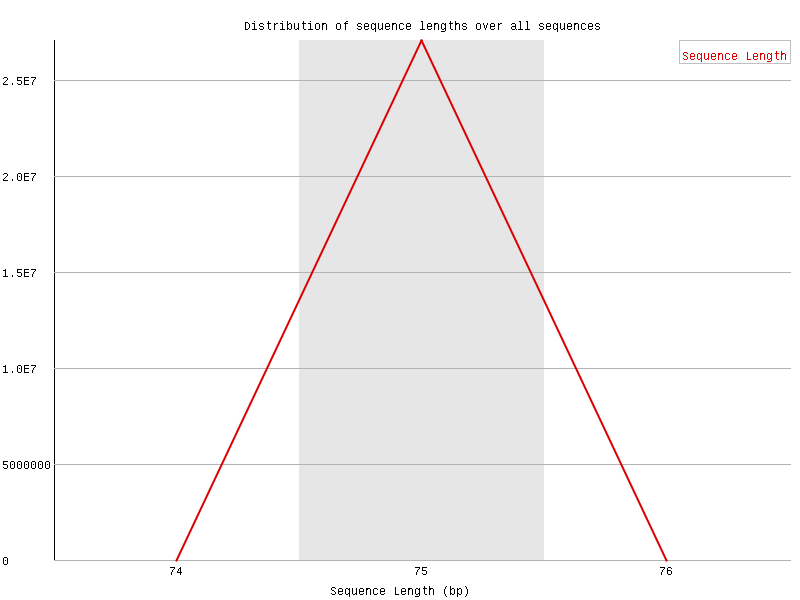  
Распределение длин последоваельностей.  
Из графика видно, что разброс длин последовательностей маленький. Все последовательности в данном эксперименте имеют длину 74-76 нуклеотидов.

- **Sequence Duplication Levels**  
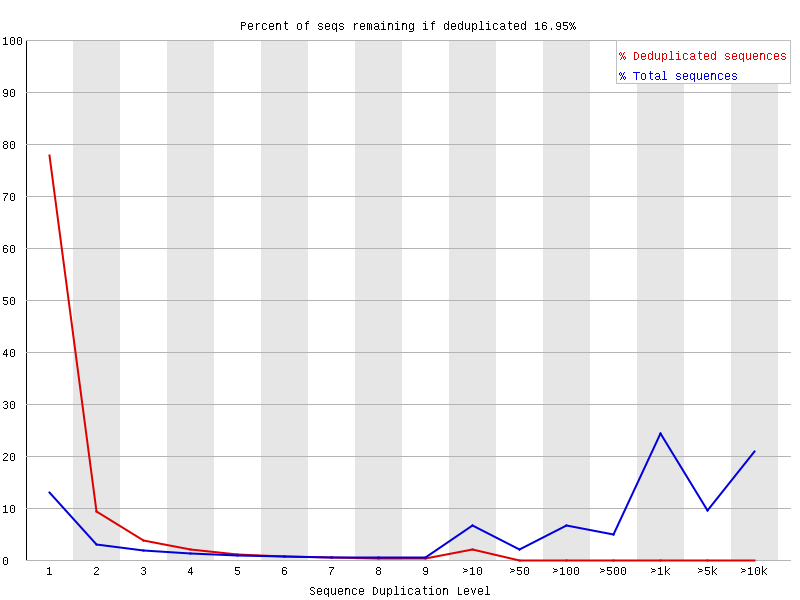  
Из графика выдно, что имеется высокий уровень дублирования последовательности,
соответственно это может вызвать проблемы с дальнейшим биоинформационным анализом и указывать на проблемы с подготовкой библиотеки или процессом секвенирования.  
Низкий уровень дупликации может указывать на высокий уровень охвата секвенируемого генома или транскриптома.  

- **Overrepresented sequences**  

В данных много примесей или артефактов, введенных в процессе подготовки библиотеки или процесса секвенирования.  

- **Adapter Content**  
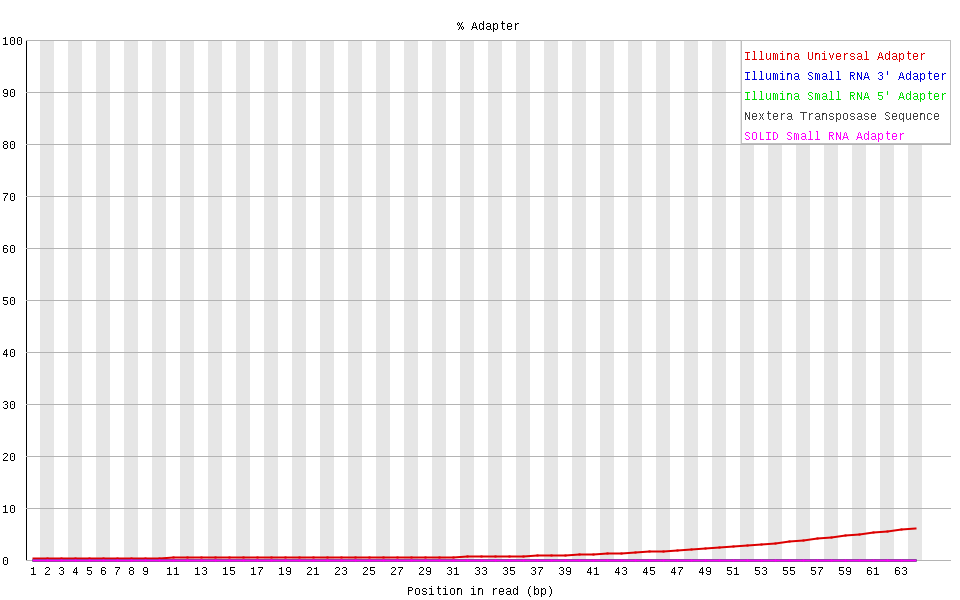  
Есть небольшое количество адаптеров. Это может снижать качество.

Так же прикладываю необходимые ссылки

 - https://www.ncbi.nlm.nih.gov/bioproject/PRJNA875378 
 - https://www.ncbi.nlm.nih.gov/genome/167  
 - https://www.ncbi.nlm.nih.gov/nuccore/NC_000913.3

### Марат Закиров

In [ ]:
%%shell
name=marat
cp -R /content/M4_HW5/$name /content/sequence/$name
cd /content/sequence/$name
gunzip SRR23302705.fastq.gz
gffread -T sequence.gff3 -o sequence.gtf && rm sequence.gff3

**В качестве организма была выбрана бактерия:**  
Escherichia coli str. K-12 substr. MG1655  

**Проект**:  
**Project**: PRJNA930389  
Effect of sub-MIC tobramycin treatment on E. coli MG1655 WT (strain classically used as WT strain) and NCM3416 (corrected rph strain)
https://www.ncbi.nlm.nih.gov/bioproject/PRJNA930389  

**Интерпретация отчета**:

- **Basic Statistics**  
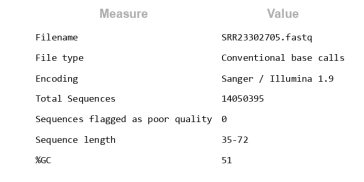
указывается информация о предоставленных данных  

- **Per base sequence quality**  
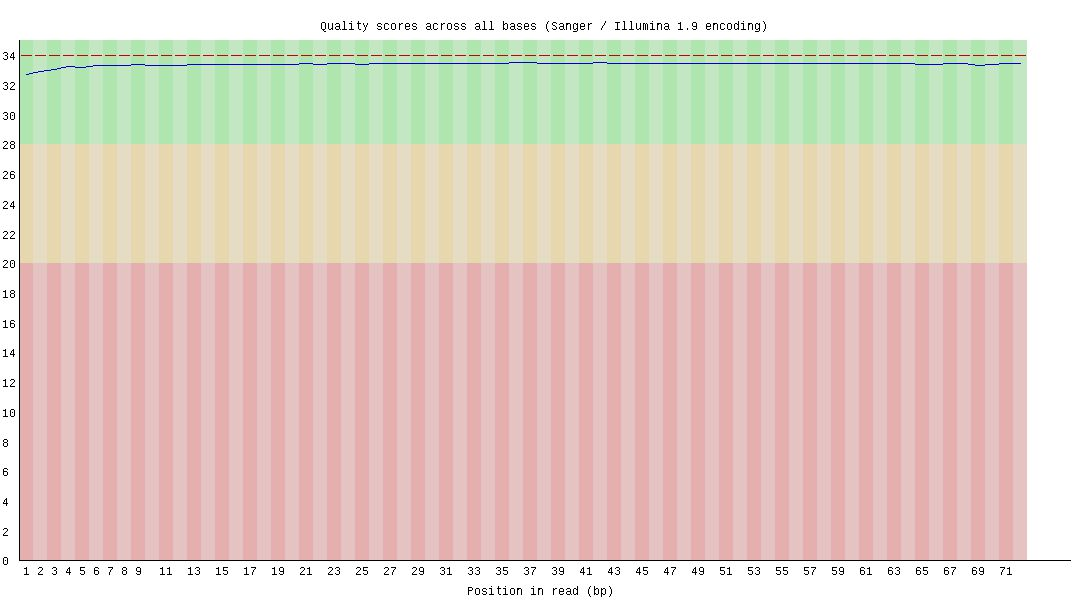  
Из данного графика видно, что информация о распределении показателей качества по всем основаниям в каждой позиции в последовательности имеет высокое качество (не менее 34).

- **Per tile sequence quality**  
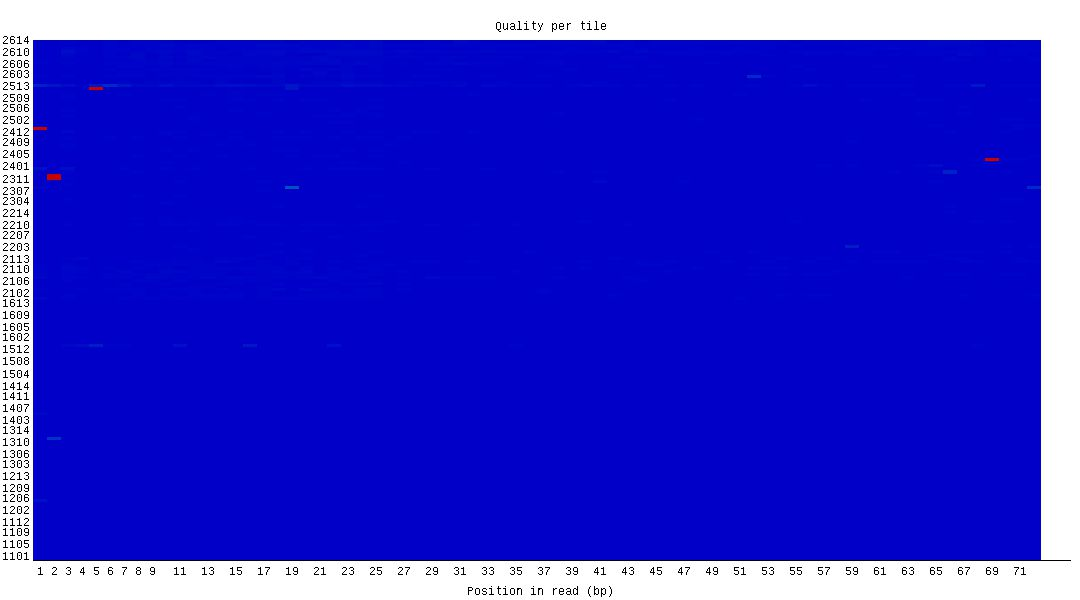
График, показывающий среднюю оценку качества последовательности для каждой плитки, а также отклонение от среднего качества для каждой плитки.  

- **Per sequence quality scores**  
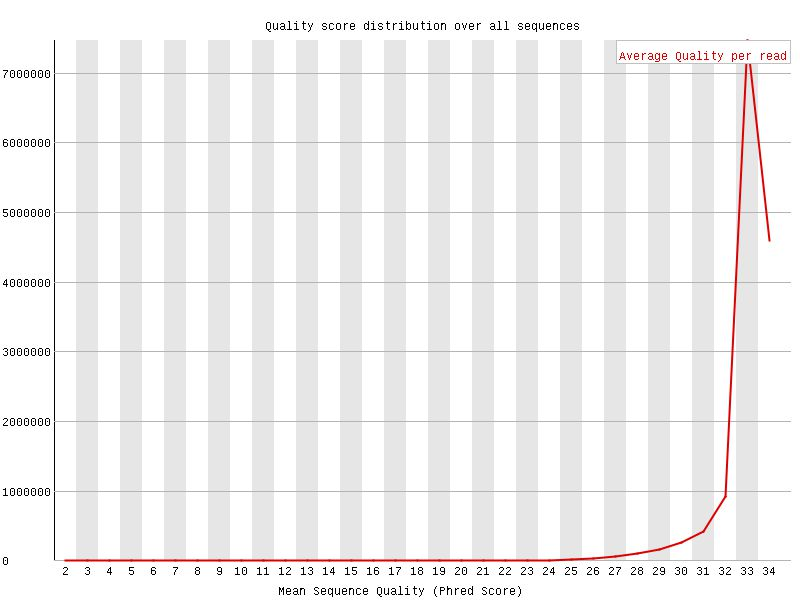
График «Показатели качества последовательности» дает представление о качестве считываний секвенирования в каждой базовой позиции и облегчает выявление потенциальных проблем или погрешностей в секвенированных данных.  
На данном графике достаточно высокое качество считываний секвенирования в каждой базовой позиции, следственно количество погрешностей и потенциальных проблем в секвенировании сводится к минимуму.

- **Per base sequence content**  
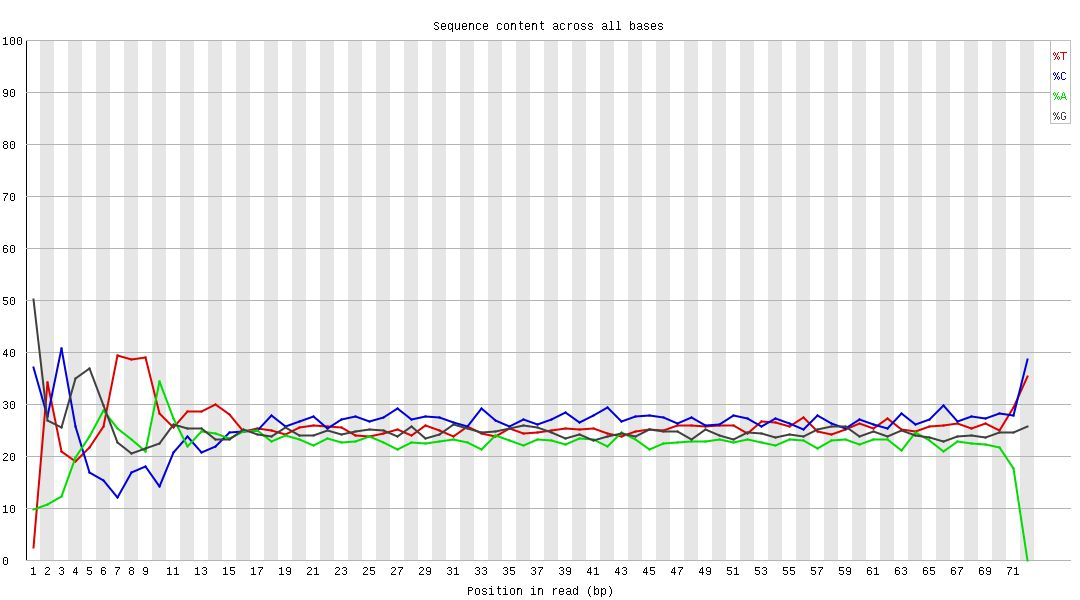
График содержимого базовой последовательности может выявить смещения или ошибки, допущенные во время секвенирования. 
Исходя из этого, в данных имеются ошибки и смещения.    

- **Per sequence GC content**  
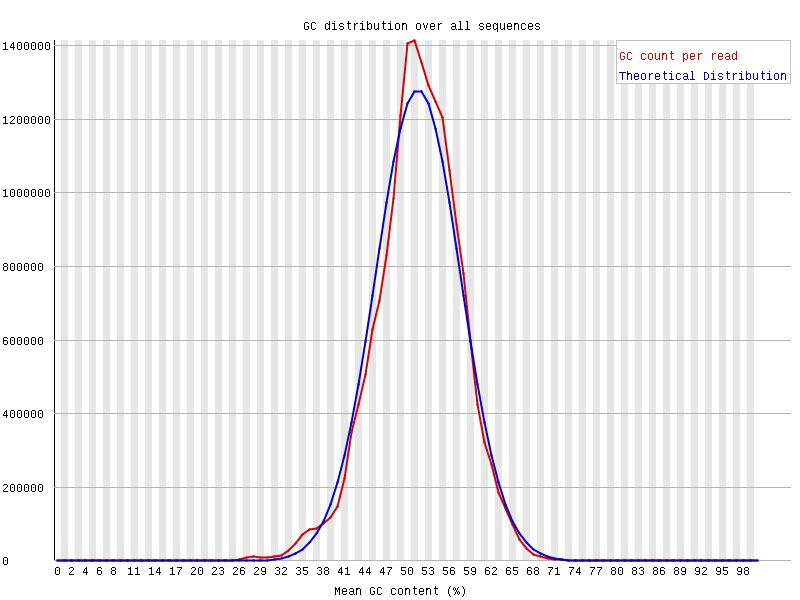
График показывает распределение содержания гуанина и цитозина по всем последовательностям.   
Из графика видно, распределение гуанина и цитозина соответствует рассчитанному теоретическому распределению.

- **Per base N content**
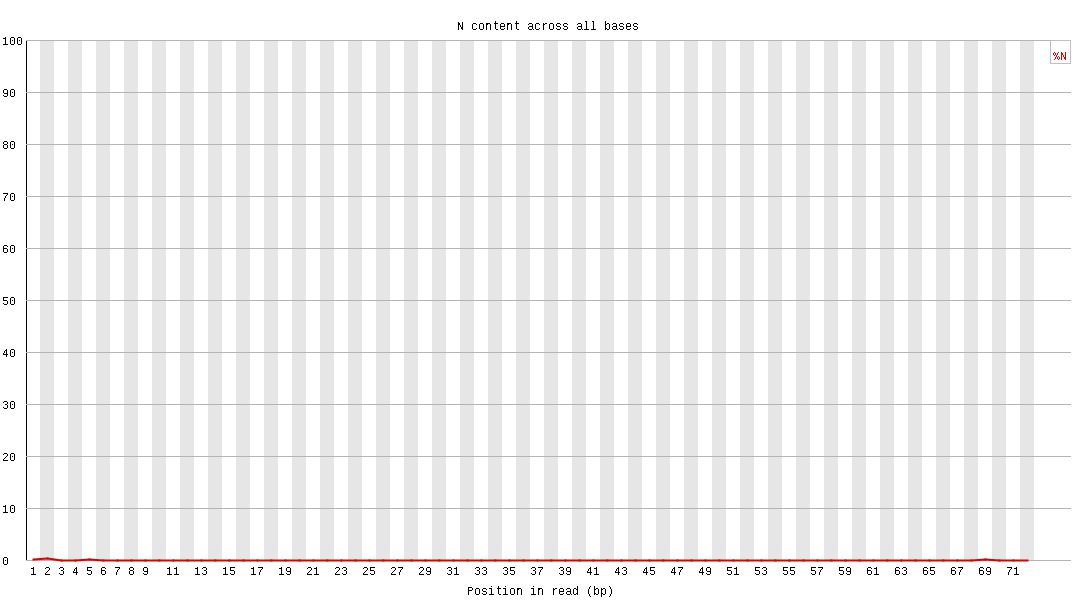
В данных не выявлено неясных или неоднозначных оснований, которые обозначаются буквой «N».  

- **Sequence Length Distribution**  
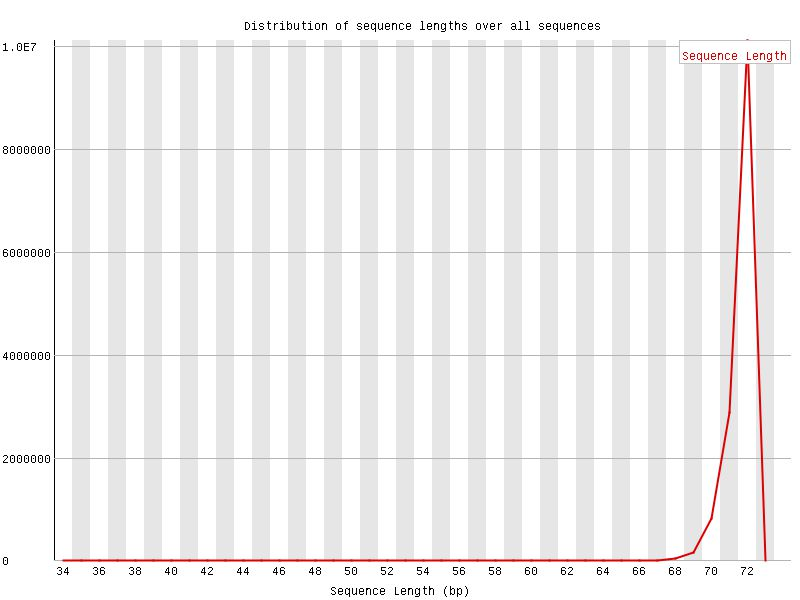
Распределение длин последоваельностей.  
Из графика видно, что имееся большой разброс длин последовательностей.

- **Sequence Duplication Levels**  
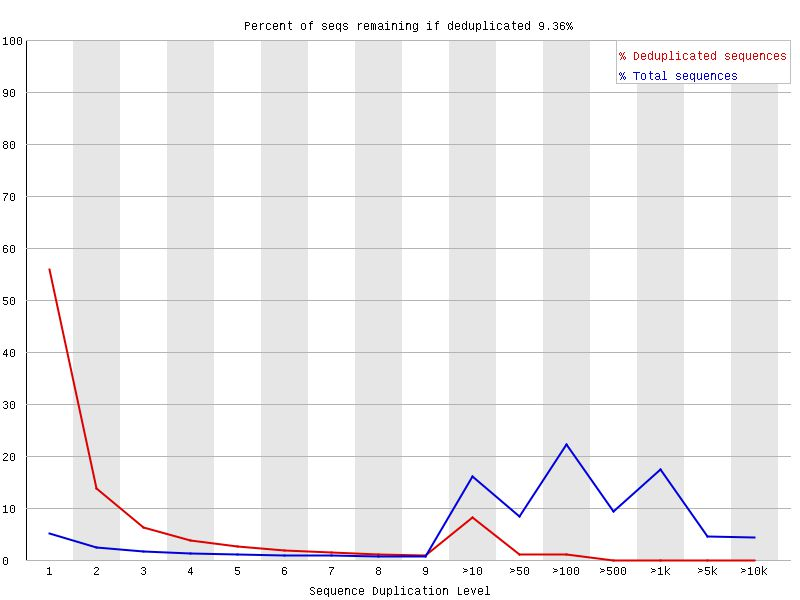
Из графика видно, что имеется высокий уровень дублирования последовательности,
соответственно это может вызвать проблемы с дальнейшим биоинформационным анализом и указывать на проблемы с подготовкой библиотеки или процессом секвенирования.  
Низкий уровень дупликации может указывать на высокий уровень охвата секвенируемого генома или транскриптома.  

- **Overrepresented sequences**  
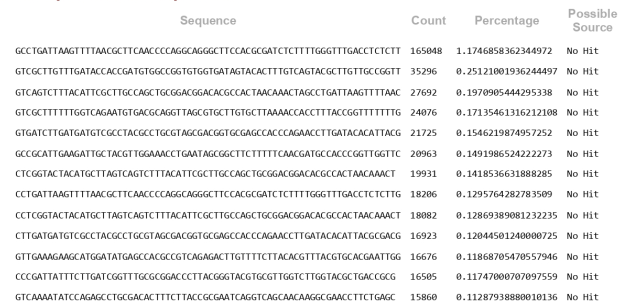
В данных много примесей или артефактов, введенных в процессе подготовки библиотеки или процесса секвенирования.  

- **Adapter Content**  
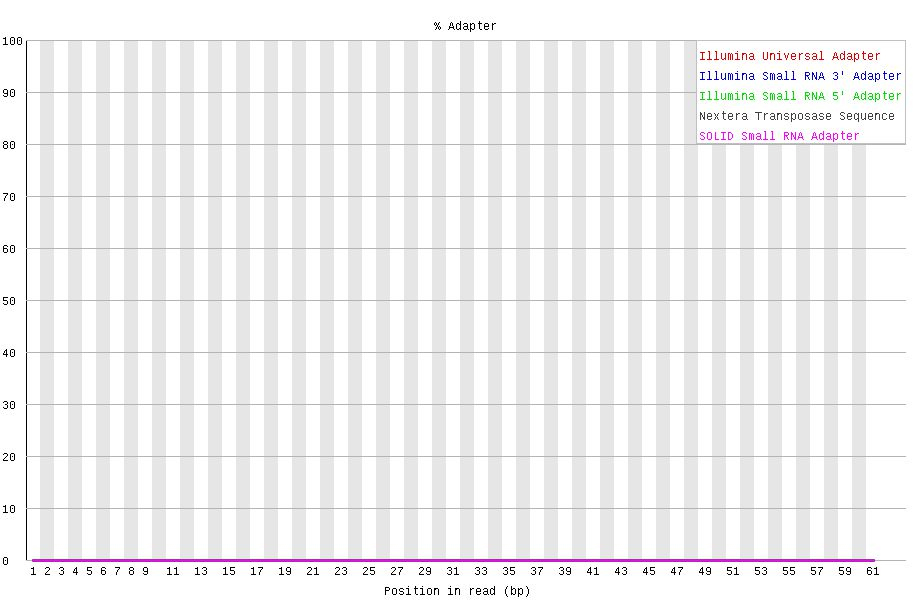
Содержимое адаптеров не выявлено.

Так же прикладываю необходимые ссылки
- **https://www.ncbi.nlm.nih.gov/bioproject/PRJNA930389** 
- **https://www.ncbi.nlm.nih.gov/genome/167** 
- **https://www.ncbi.nlm.nih.gov/nuccore/NC_000913.3** 

In [ ]:
!sh /content/M4_HW5/script.sh

Started analysis of SRR23625956.fastq
Approx 5% complete for SRR23625956.fastq
Approx 10% complete for SRR23625956.fastq
Approx 15% complete for SRR23625956.fastq
Approx 20% complete for SRR23625956.fastq
Approx 25% complete for SRR23625956.fastq
Approx 30% complete for SRR23625956.fastq
Approx 35% complete for SRR23625956.fastq
Approx 40% complete for SRR23625956.fastq
Approx 45% complete for SRR23625956.fastq
Approx 50% complete for SRR23625956.fastq
Approx 55% complete for SRR23625956.fastq
Approx 60% complete for SRR23625956.fastq
Approx 65% complete for SRR23625956.fastq
Approx 70% complete for SRR23625956.fastq
Approx 75% complete for SRR23625956.fastq
Approx 80% complete for SRR23625956.fastq
Approx 85% complete for SRR23625956.fastq
Approx 90% complete for SRR23625956.fastq
Approx 95% complete for SRR23625956.fastq
Analysis complete for SRR23625956.fastq
[bwa_index] Pack FASTA... 0.03 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 1.53 seconds elapse.
[bwa

In [ ]:
from google.colab import files
!zip -r /content/sequence_mikhail.zip /content/sequence/mikhail
#files.download('/content/sequence/marat/M4_MaratAligned.out.sam')

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
  adding: content/sequence/mikhail/ (stored 0%)
  adding: content/sequence/mikhail/sequence.fasta.ann (deflated 5%)
  adding: content/sequence/mikhail/sequence.fasta.sa (deflated 51%)
  adding: content/sequence/mikhail/mikhail.sam (deflated 83%)
  adding: content/sequence/mikhail/sequence.fasta.amb (stored 0%)
  adding: content/sequence/mikhail/sequence.fasta.pac (deflated 1%)
  adding: content/sequence/mikhail/M4_MikhailLog.progress.out (deflated 86%)
  adding: content/sequence/mikhail/SRR21375816_fastqc.html (deflated 70%)
  adding: content/sequence/mikhail/sequence.fasta (deflated 70%)
  adding: content/sequence/mikhail/M4_Mikhail_STARgenome/ (stored 0%)
  adding: content/sequence/mikhail/M4_Mikhail_STARgenome/transcriptInfo.tab (deflated 69%)
  adding: content/sequence/mikhail/M4_Mikhail_STARgenome/exonInfo.tab (deflated 85%)
  adding: content/sequence/mikhail/M4_Mikh

In [ ]:
files.download('/content/sequence_mikhail.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# mount it
from google.colab import drive
drive.mount('/content/drive')
# copy it there
!cp /content/sequence_mikhail.zip /content/drive/MyDrive/M4_HW5

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory


__*Комментарии преподавателя:*__<br>
*Дарья Бородко・Преподаватель<br>*

>*Добрый день! Было бы очень круто, если бы вы еще БЛАСТнули перепредставленные последовательности из отчета и посмотрели, что это такое :) Для дальнейшего анализа их может потребоваться отфильтровать, тогда надо понимать их природу. Хорошая работа!*